# Difference Expansion based on Minimum Value of each Block

DEMAR merupakan teknik steganografi yang menyematkan atau menyisipkan data ke dalam gambar berdasarkan perbedaan nilai pixel terkecil dengan setiap nilai di setiap blok.

## Import the libary
Jika python anda tidak mengenali libary yang ada maka install menggunakan PIP pada command promp atau terminal anda

```
! pip install <name_library>

# example
! pip install matplotlib
```

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from skimage.metrics import structural_similarity as SSIM
from skimage.metrics import peak_signal_noise_ratio as PSNR
from sklearn.metrics import mean_squared_error as MSE

# Function
Dalam codingan dibawah ini merupakan sekumpulan kode yang berisi metode penyisipan (stgDEMAR) dan ekstraksi data (xtrDEMAR).

In [ ]:
def stgDEMAR(img_br, hidden, abs=5, lenght=16):
  h = 0
  stego_img = img_br.copy()
  TRT = random.randint(1, size=img_br.shape)
  for i, rows in enumerate(img_br):
    for j in range(0,len(rows)-(len(rows)%lenght),lenght):
      min_arr = np.min([x for x in rows[j:j+lenght]])
      dif_arr = [x - min_arr for x in rows[j:j+lenght]]
      for ia, d in enumerate(dif_arr):
        if 0 < d <= abs:
          if h < len(hidden):
            TRT[i][j+ia] = 1
            stego_img[i][j+ia] = int(rows[j+ia]) + d + int(hidden[h])
          h = h+1
  cv2.imwrite("stego_image.png", stego_img)
  return stego_img, TRT, h

def xtrDEMAR(stego_img, TRT, lenght=16):
  secrets = []
  original_img = stego_img.copy()
  for i, rows in enumerate(stego_img):
    for j, track in enumerate(rows):
      if TRT[i][j]==1:
        t = j - j%16
        min_arr = np.min([x for x in rows[t:t+16]])
        min_dif = [x - min_arr for x in rows[t:t+16]]
        original_img[i][j] = stego_img[i][j] - int(min_dif[j%16]/2) - min_dif[j%16]%2
        secrets.append(min_dif[j%16]%2)
  return original_img, secrets

## Parameter
untuk membantu Anda yang tidak terbiasa coding, saya memberikan parameter dibawah ini yang bisa anda isi



```
path : alamat cover image yang akan gunakan
secret_message : pesan yang ingin anda sembunyikan
```



In [ ]:
#parameter
path = './Pictures and Payload/Pictures/Boat.tiff'
message = "INFORMATICS"

Jalankan program ini setelah anda mengisi parameter untuk melakukan embbeding. Jangan lupa parameter sebelumnya harus dijalankan juga.

In [ ]:
print("\n============ Data Embbeding Process ===========\n")
print("1. Input Cover Image")
cv2_img = cv2.imread(path)
gray_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2GRAY)
cover_img = cv2.resize(gray_img, (512,512))
print("2. Input Secret Data : ", message)
ascii = message.encode('utf-8')
secretData = np.base_repr(int(ascii.hex(), 16), base=2)
print("\n------------- Change ASCII to Bit -------------\n")
print(secretData)
print("\n--------- proses to hidden secret bit ---------")
print("--------- .............^-^........... ---------")
stego_img, trt, h = stgDEMAR(cover_img, secretData, abs=5, lenght=16)
print("--------- .............^-^........... ---------")
print("--------- .............^-^........... ---------")
print("-------- success to embed data in image -------\n")
print("3. Get PSNR and Capacity")
print("PSNR Value is    :", round(PSNR(stego_img, cover_img),3))
print("Payload Capacity :", round(h/cover_img.size,3), "%")


============ Data Embbeding Process ===========

1. Input Cover Image
2. Input Secret Data : INFORMATICS

------------- Change ASCII to Bit -------------

01001001010011100100011001001111010100100100110
10100000101010100010010010100001101010011

--------- proses to hidden secret bit ---------
--------- .............^-^........... ---------
--------- .............^-^........... ---------
--------- .............^-^........... ---------
-------- success to embed data in image -------

3. Get PSNR and Capacity
PSNR Value is    : 70.679
Payload Capacity : 0.155 %


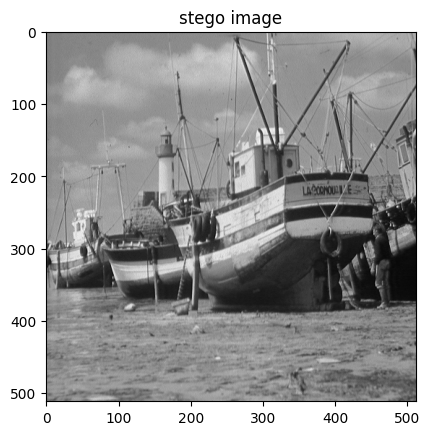

In [ ]:
plt.title('stego image')
plt.imshow(stego_img, cmap='gray')

Jalankan program dibawah ini untuk mengektrak data tersebunyi dari gambar, pastikan variabel yang diminta sudah Anda deklarasikan

In [ ]:
print("\n============= Data Extraction Process ============\n")
print("1. Input Stego Image")
print("\n---------- proses to extract secret bit ----------")
print("---------- ..............^-^........... ----------")
original_img, secrets = xtrDEMAR(stego_img, trt, lenght=16)
print("---------- ..............^-^........... ----------")
print("---------- ..............^-^........... ----------")
print("-------- success to extract data in image --------\n")
print("2. Get secret bit")
# Getting the byte number
byte_number = int(secrets,2).bit_length() + 7 // 8
secretMessage = int(secrets,2).to_bytes(byte_number, "big").decode()
print("\nSecret Bit :", secrets)
print("\n-------------- Change Bit to ASCII ---------------\n")
print("Secret Message : ", secretMessage)


============= Data Extraction Process ============

1. Input Stego Image

---------- proses to extract secret bit ----------
---------- ..............^-^........... ----------
---------- ..............^-^........... ----------
---------- ..............^-^........... ----------
-------- success to extract data in image --------

2. Get secret bit

Secret Bit :01001001010011100100011001001111010100
10010011010100000101010100010010010100001101010011

-------------- Change Bit to ASCII ---------------

Secret Message : INFORMATICS
